### Phép biến đổi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Điều chỉnh tương phản bằng log

$$I'(x, y) = 255 * \frac{\log(I(x,y)+1)}{\log(Max(I(x,y))+1)}$$

In [36]:
def logarit(img, a):
    c = 255 / np.log(np.max(img + a))
    return np.uint8(c * (np.log(img + a)))

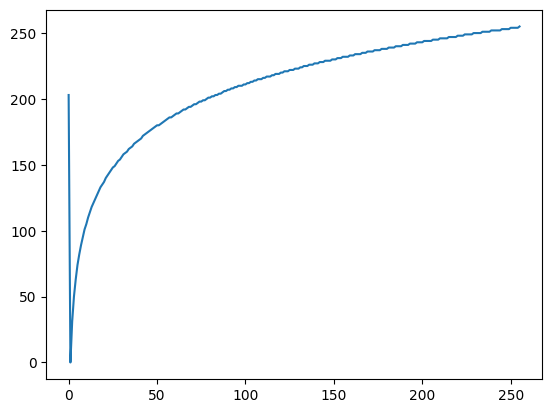

In [40]:
# plot the function
x = np.arange(0, 256, 1)
y = logarit(x, 0.0012)
plt.plot(x, y)
plt.show()

C:\Users\karin\AppData\Local\Temp\ipykernel_13044\917003746.py:3: RuntimeWarning: divide by zero encountered in log
  return np.uint8(c * (np.log(img + a)))
C:\Users\karin\AppData\Local\Temp\ipykernel_13044\917003746.py:3: RuntimeWarning: invalid value encountered in log
  return np.uint8(c * (np.log(img + a)))


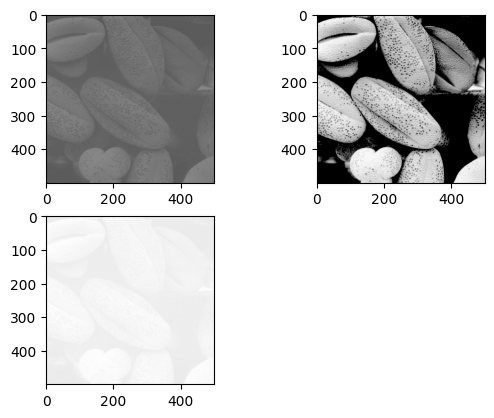

In [116]:
# test
img = cv2.imread('img2.jpg')
plt.subplot(221)
plt.imshow(img, cmap='gray')
img1 = logarit(img, -100)
plt.subplot(222)
plt.imshow(img1, cmap='gray')
img2 = logarit(img, 10)
plt.subplot(223)
plt.imshow(img2, cmap='gray')
plt.show()

#### Thí nghiệm kết hợp tách ngưỡng và các hàm chuyển khác

In [12]:
def thresshold_negative(x, thresshold):
    x[x < thresshold] = 0
    return x

In [29]:
def negative(frame):
    frame = 255 - frame
    return frame

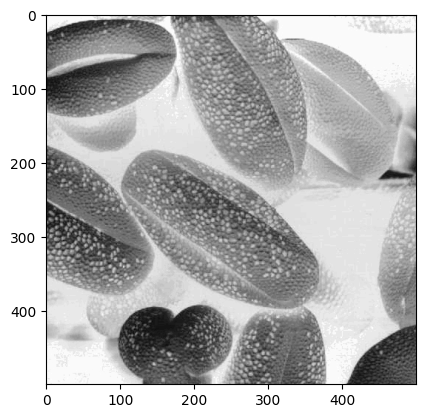

In [25]:
img = plt.imread('img2.jpg', 0)
img = negative(img)
img_log = logarit(img)
neg_img = thresshold_negative(img_log, 50)
plt.imshow(neg_img, cmap='gray')

$$\begin{equation}I'(x,y) = \begin{cases}
\alpha.I(x,y) & \text{nếu I(x,y)} < k1 \\
\beta.I(x,y) + \alpha.k1 & k1 <= \text{nếu I(x,y)} <= k2 \\
\alpha.I(x,y) + \alpha.k1 + \beta.(k2-k1) & \text{nếu I(x,y)} > k2 \\
\end{cases}
\end{equation}$$

In [48]:
def contrast_stretching(img, r1, s1, r2, s2):
    img = np.copy(img)

    mask1 = img < r1
    mask2 = (img >= r1) & (img <= r2)
    mask3 = img > r2

    img[mask1] = s1 / r1 * img[mask1]
    img[mask2] = ((s2 - s1) / (r2 - r1)) * (img[mask2] - r1) + s1
    img[mask3] = ((255 - s2) / (255 - r2)) * (img[mask3] - r2) + s2

    return img

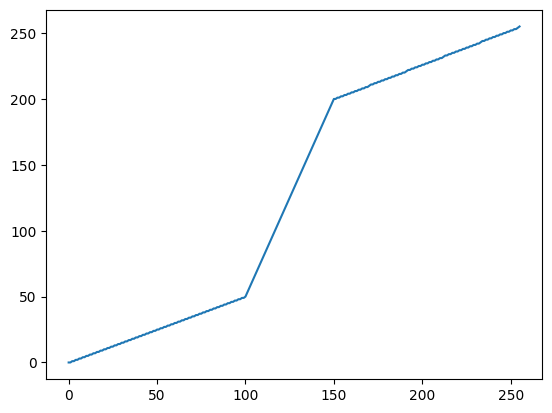

In [43]:
# plot the function
x = np.arange(0, 256)
y = [contrast_stretching(i, 100, 50, 150, 200) for i in x]
plt.plot(x, y)

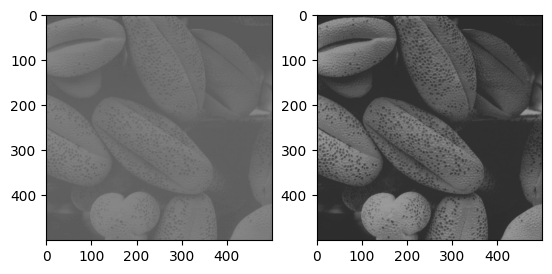

In [42]:
# test
img = cv2.imread('img2.jpg')
plt.subplot(121)
plt.imshow(img, cmap='gray')
img = contrast_stretching(img, 100, 50, 150, 200)
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.show()

#### Điều chỉnh min max tương phản

$$I'(x,y)= \frac{I(x,y)- min(I(x,y))}{max(I(x,y)) - min(I(x,y))}$$

In [7]:
def min_max_stretching(img):
    a = np.min(img)
    b = np.max(img)
    return (img - a + 1) * 255 / (b - a + 1)

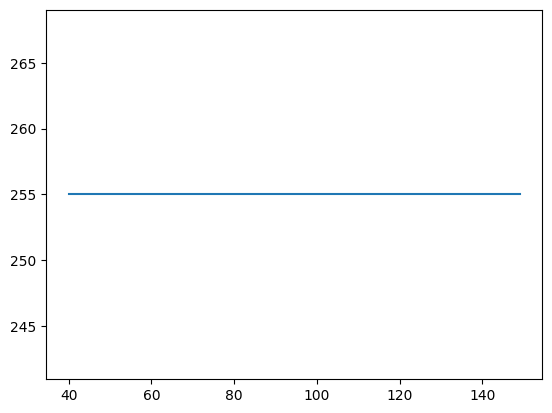

In [8]:
# plot the function
x = np.arange(40, 150)
y = [min_max_stretching(i) for i in x]
plt.plot(x, y)

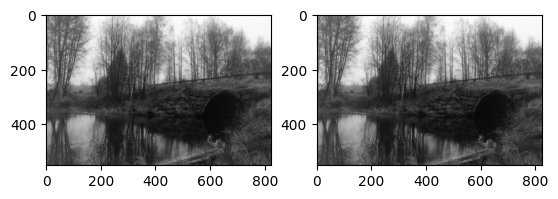

In [31]:
img = cv2.imread('img8.png', 0)
plt.subplot(121)
plt.imshow(img, cmap='gray')
img = min_max_stretching(img)
plt.subplot(122)
plt.imshow(negative(img), cmap='gray')
plt.show()

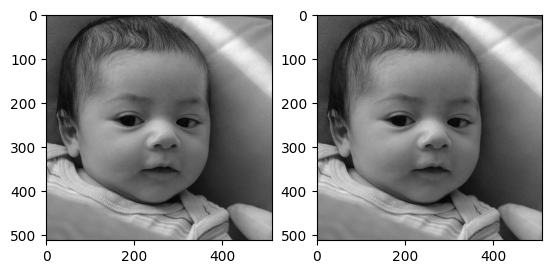

In [57]:
# look up table example
look_up_table = np.zeros(256, dtype = 'uint8')
for i in range(256):
    look_up_table[i] = contrast_stretching(i, 50, 50, 200, 200)
plt.subplot(121)
img = cv2.imread('img01.jpg', 0)
plt.imshow(img, cmap='gray')
plt.subplot(122)
img = cv2.LUT(img, look_up_table)
plt.imshow(img, cmap='gray')
plt.show()